# Gradient Descent Visualization

In this notebook, we're going to take a closer look at **Gradient Descent (GD)**, a key technique widely used in optimization problems and ML. The idea behind GD is simple yet powerful: iteratively adjust parameters to find the minimum of a function. It’s like rolling a ball down a hill and watching it settle at the lowest point.

We will walk through this process with a hands-on approach, allowing you to choose a function, compute its gradient, and observe how the algorithm converges towards the optimal solution. By visualizing the steps, you’ll get a better grasp of how gradient descent works in practice.

## Step 1: Choosing a Function

Before we begin applying the gradient descent algorithm, let's pick a function to work with. You have several options, each representing a different mathematical curve. The function you select will influence how gradient descent behaves, so feel free to experiment!

In [1]:
import sys
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

x = sp.Symbol('x') # Symbolic variable

functions = {
    1: x**2,
    2: x**3 - 3*x + 1,
    3: sp.exp(x),
    4: sp.ln(x), # Only valid for x > 0
    5: sp.sin(x),
    6: x**2 + sp.sin(5*x)
}

print('Choose a function for gradient descent:')
print('1: f(x) = x^2')
print('2: f(x) = x^3 - 3x + 1')
print('3: f(x) = e^x')
print('4: f(x) = ln(x) (only for x > 0)')
print('5: f(x) = sin(x)')
print('6: f(x) = x^2 + sin(5x)')

choice = int(input('Enter the number of your chosen function (1-6): '))

if choice not in functions:
    raise ValueError('Invalid choice. Please restart and select a valid number.')

f_expr = functions[choice]

df_expr = sp.diff(f_expr, x) # Compute derivative

# Convert symbolic expressions to numerical functions
f = sp.lambdify(x, f_expr, 'numpy')
df = sp.lambdify(x, df_expr, 'numpy')
print('----------------')
display(Math(f"f(x) = {sp.latex(f_expr)}"))
display(Math(f"f'(x) = {sp.latex(df_expr)}"))
print('----------------')

Choose a function for gradient descent:
1: f(x) = x^2
2: f(x) = x^3 - 3x + 1
3: f(x) = e^x
4: f(x) = ln(x) (only for x > 0)
5: f(x) = sin(x)
6: f(x) = x^2 + sin(5x)
Enter the number of your chosen function (1-6): 1
----------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------------


## Step 2: Applying Gradient Descent

Now that we’ve selected a function, it's time to let the gradient descent algorithm work its magic. We’ll start with an initial guess for the value of x, and then use the gradient (the slope of the function at any point) to update our guess, iterating until we find the minimum or converge to a point where the gradient is too small to make meaningful changes.

This is where the learning rate comes in: it controls how big the steps are in each iteration. If the learning rate is too high, we might overshoot the minimum. If it’s too small, we’ll take forever to converge. But don’t worry—we’ve set up stopping conditions to make sure the process doesn’t run indefinitely.

Final point after 30 iterations: x = 0.006189700196426903, f(x) = 3.8312388521647236e-05


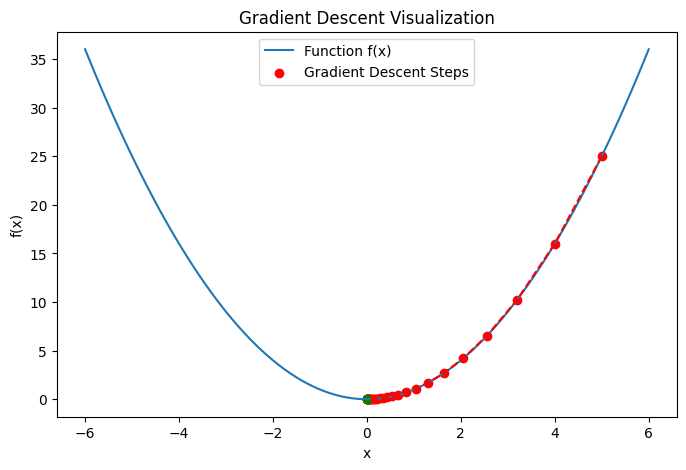

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient descent parameters
learning_rate = 0.1
iterations = 30
x_init = 5
tolerance = 1e-6  # Tolerance for stopping when the gradient is small or change is negligible

# Initialize values
x_values = [x_init]
x = x_init
prev_f_x = f(x)

# Gradient descent process
for i in range(iterations):
    grad = df(x)  # Gradient (derivative)

    x = x - learning_rate * grad # Update x using gradient descent
    x_values.append(x)

    f_x = f(x) # Compute new function value

    # Check stopping conditions
    if np.abs(grad) < tolerance:  # Gradient is too small
        print("Stopping early due to small gradient.")
        break
    if np.abs(f_x - prev_f_x) < tolerance:  # Function value change is too small
        print("Stopping early due to small function value change.")
        break

    prev_f_x = f_x  # Update previous function value

final_x = x_values[-1]
final_f_x = f(final_x)
print(f"Final point after {len(x_values) - 1} iterations: x = {final_x}, f(x) = {final_f_x}")

# Generate function values for visualization
x_plot = np.linspace(-6, 6, 100)
y_plot = f(x_plot)

# Plot function and gradient descent steps
plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_plot, label='Function f(x)')
plt.scatter(x_values, [f(x) for x in x_values], color='red', label='Gradient Descent Steps')
plt.plot(x_values, [f(x) for x in x_values], linestyle='dashed', color='red')

# Highlight the final point in green
plt.scatter(final_x, final_f_x, color='green')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Gradient Descent Visualization')
plt.show()